In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 200)
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
import matplotlib_inline
from pathlib import Path

# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["figure.facecolor"] = "white"
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from IPython.display import display, Latex, HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
img {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;
}
</style>
""")

<h1 style="text-align: center;">Electrical Vehicles Regression Analysis</h1>

<h3 style="text-align: center;">Group 2, C1</h3>

# Introduction

In recent years, more and more people are buying Electrical Vehicles (EVs) for environmental, aesthetic, and financial reasons. The number of car companies inventing EVs for their brand are increasing. Companies such as Tesla, Ford, and Rivian are taking advantage of this move toward EVs. The goal of our project is to examine just how much the range of EVs changes due to other factors such as battery pack. In this paper we analyze the relation between the range and other variables such as acceleration, top speed, battery pack, efficiency, fast charge and price in order to give us a deeper understanding of what element influences the range of EVs the most. Additionally, we can also see what car manufacturers should do to improve their EVs, and provide useful data for car companies.

# Background

## Dataset
Divyanshu Gupta, Kaggle (2021), Cars Dataset with Battery Capacity [Data File]. Retrieved from [https://www.kaggle.com/datasets/divyanshugupta95/cars-dataset-with-battery-pack-capacity](https://www.kaggle.com/datasets/divyanshugupta95/cars-dataset-with-battery-pack-capacity)

## Data Collection Method
The data was collected from different companies such as Tesla, Porsche, BMW. The data set also gives us the specific make and model of the cars. The dataset contains 14 explanatory variables with 1 response variable and a total of 102 data points. 

# Preliminary Analysis

## Hypothesized Variables That Impact Electric Vehicle Range
The main covariate that we believe will have the largest impact on the range of an electric vehicle is battery packs in kilowatts per hour. The other variables that we are looking at would be acceleration, top speed, efficiency, how fast the car charges, and price. Qualitative variables would be the plug style, number of seats, power train (all wheel drive vs. four wheel drive), and type of car. This mix of qualitative and quantitative variables will allow us to give a clearer understanding of how different factors affect the range of EVs.

In [2]:
df = pd.read_csv("ev_data.csv")

In [3]:
df.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,110.0,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,35.8,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,45.0,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,50.0,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,77.0,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [4]:
X = df.drop('Range_Km', axis=1)
y = df['Range_Km']

In [5]:
quantitative = X.select_dtypes([int, float]).drop(['Seats'], axis=1)

In [6]:
cond = (quantitative.abs() <= (quantitative.mean(axis=0) + 3*quantitative.std(axis=0))).all(axis=1)
X_clean = quantitative.loc[cond]
y_clean = y[cond]

## Exploring Influence of Outliers
We tested different outlier removal methods such as taking away data that was two and three standard deviations away from mean. Figure 1 compares the linear relationship of covariates against Range_Km with and without outliers respectively:

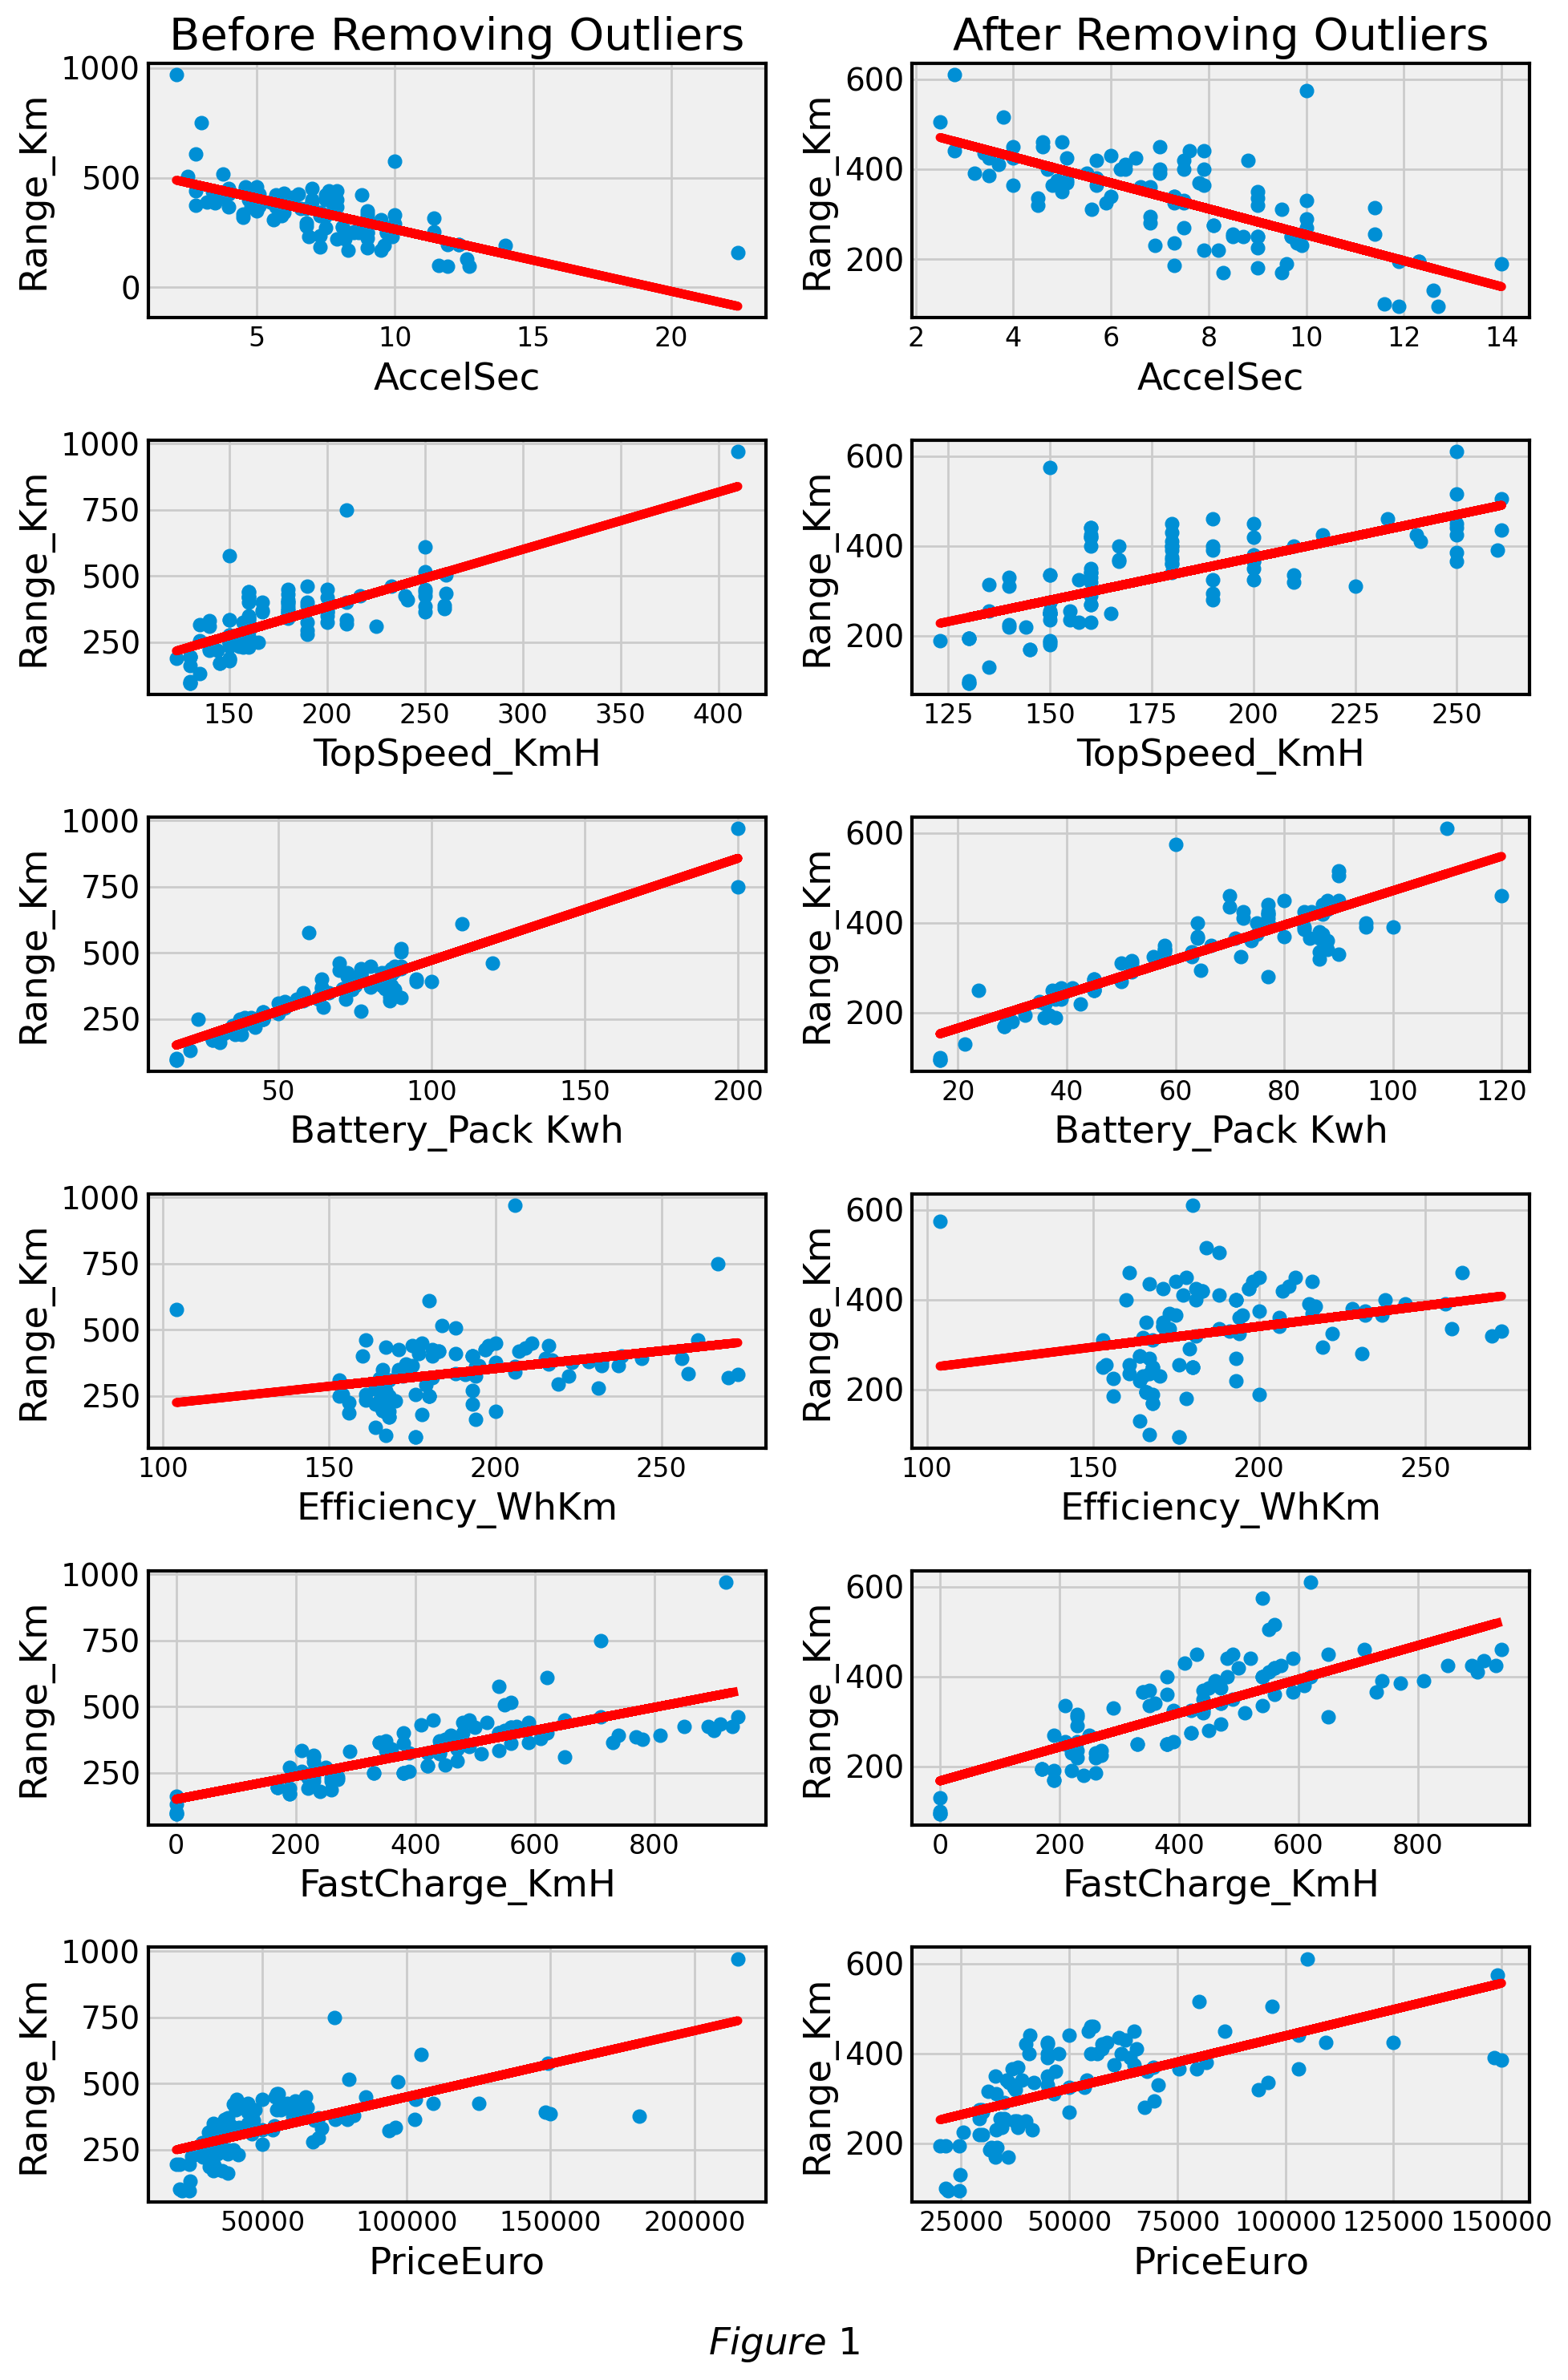

In [7]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), tight_layout=True)

dict_r_2 = {"Covariate": [], "$R^2$ Before": [], "$R^2$ After": []}

axs[0, 0].set_title("Before Removing Outliers")
for idx, covariate in enumerate(quantitative):
    reg = LinearRegression()
    X_np = X[covariate].to_numpy().reshape(-1, 1)
    y_np = y.to_numpy().reshape(-1, 1)
    reg.fit(X_np, y_np)
    y_hat = reg.predict(X_np)
    r_2 = round(r2_score(y_np, y_hat), 3)
    # display(Latex(f"$R^2$ for {covariate}: {r_2}"))
    axs[idx, 0].scatter(X_np, y_np)
    axs[idx, 0].plot(X_np, y_hat, color='r')
    axs[idx, 0].set_xlabel(covariate)
    axs[idx, 0].set_ylabel('Range_Km')
    axs[idx, 0].tick_params(axis='x', labelsize=12)
    dict_r_2["Covariate"].append(covariate)
    dict_r_2["$R^2$ Before"].append(r_2)
    
axs[0, 1].set_title("After Removing Outliers")
for idx, covariate in enumerate(quantitative):
    reg = LinearRegression()
    X_np = X_clean[covariate].to_numpy().reshape(-1, 1)
    y_np = y_clean.to_numpy().reshape(-1, 1)
    reg.fit(X_np, y_np)
    y_hat = reg.predict(X_np)
    r_2 = round(r2_score(y_np, y_hat), 3)
    # display(Latex(f"$R^2$ for {covariate} with outliers removed: {r_2}"))
    axs[idx, 1].scatter(X_np, y_np)
    axs[idx, 1].plot(X_np, y_hat, color='r')
    axs[idx, 1].set_xlabel(covariate)
    axs[idx, 1].set_ylabel('Range_Km')
    axs[idx, 1].tick_params(axis='x', labelsize=12)
    dict_r_2["$R^2$ After"].append(r_2)
    
lbl = fig.supxlabel(r"$Figure$ 1")

After analyzing the best-fit lines with and without outliers we went on to analyze the corresponding residual plots. Figure 2 compares the residual plots of covariates against Range_Km with and without outliers respectively:

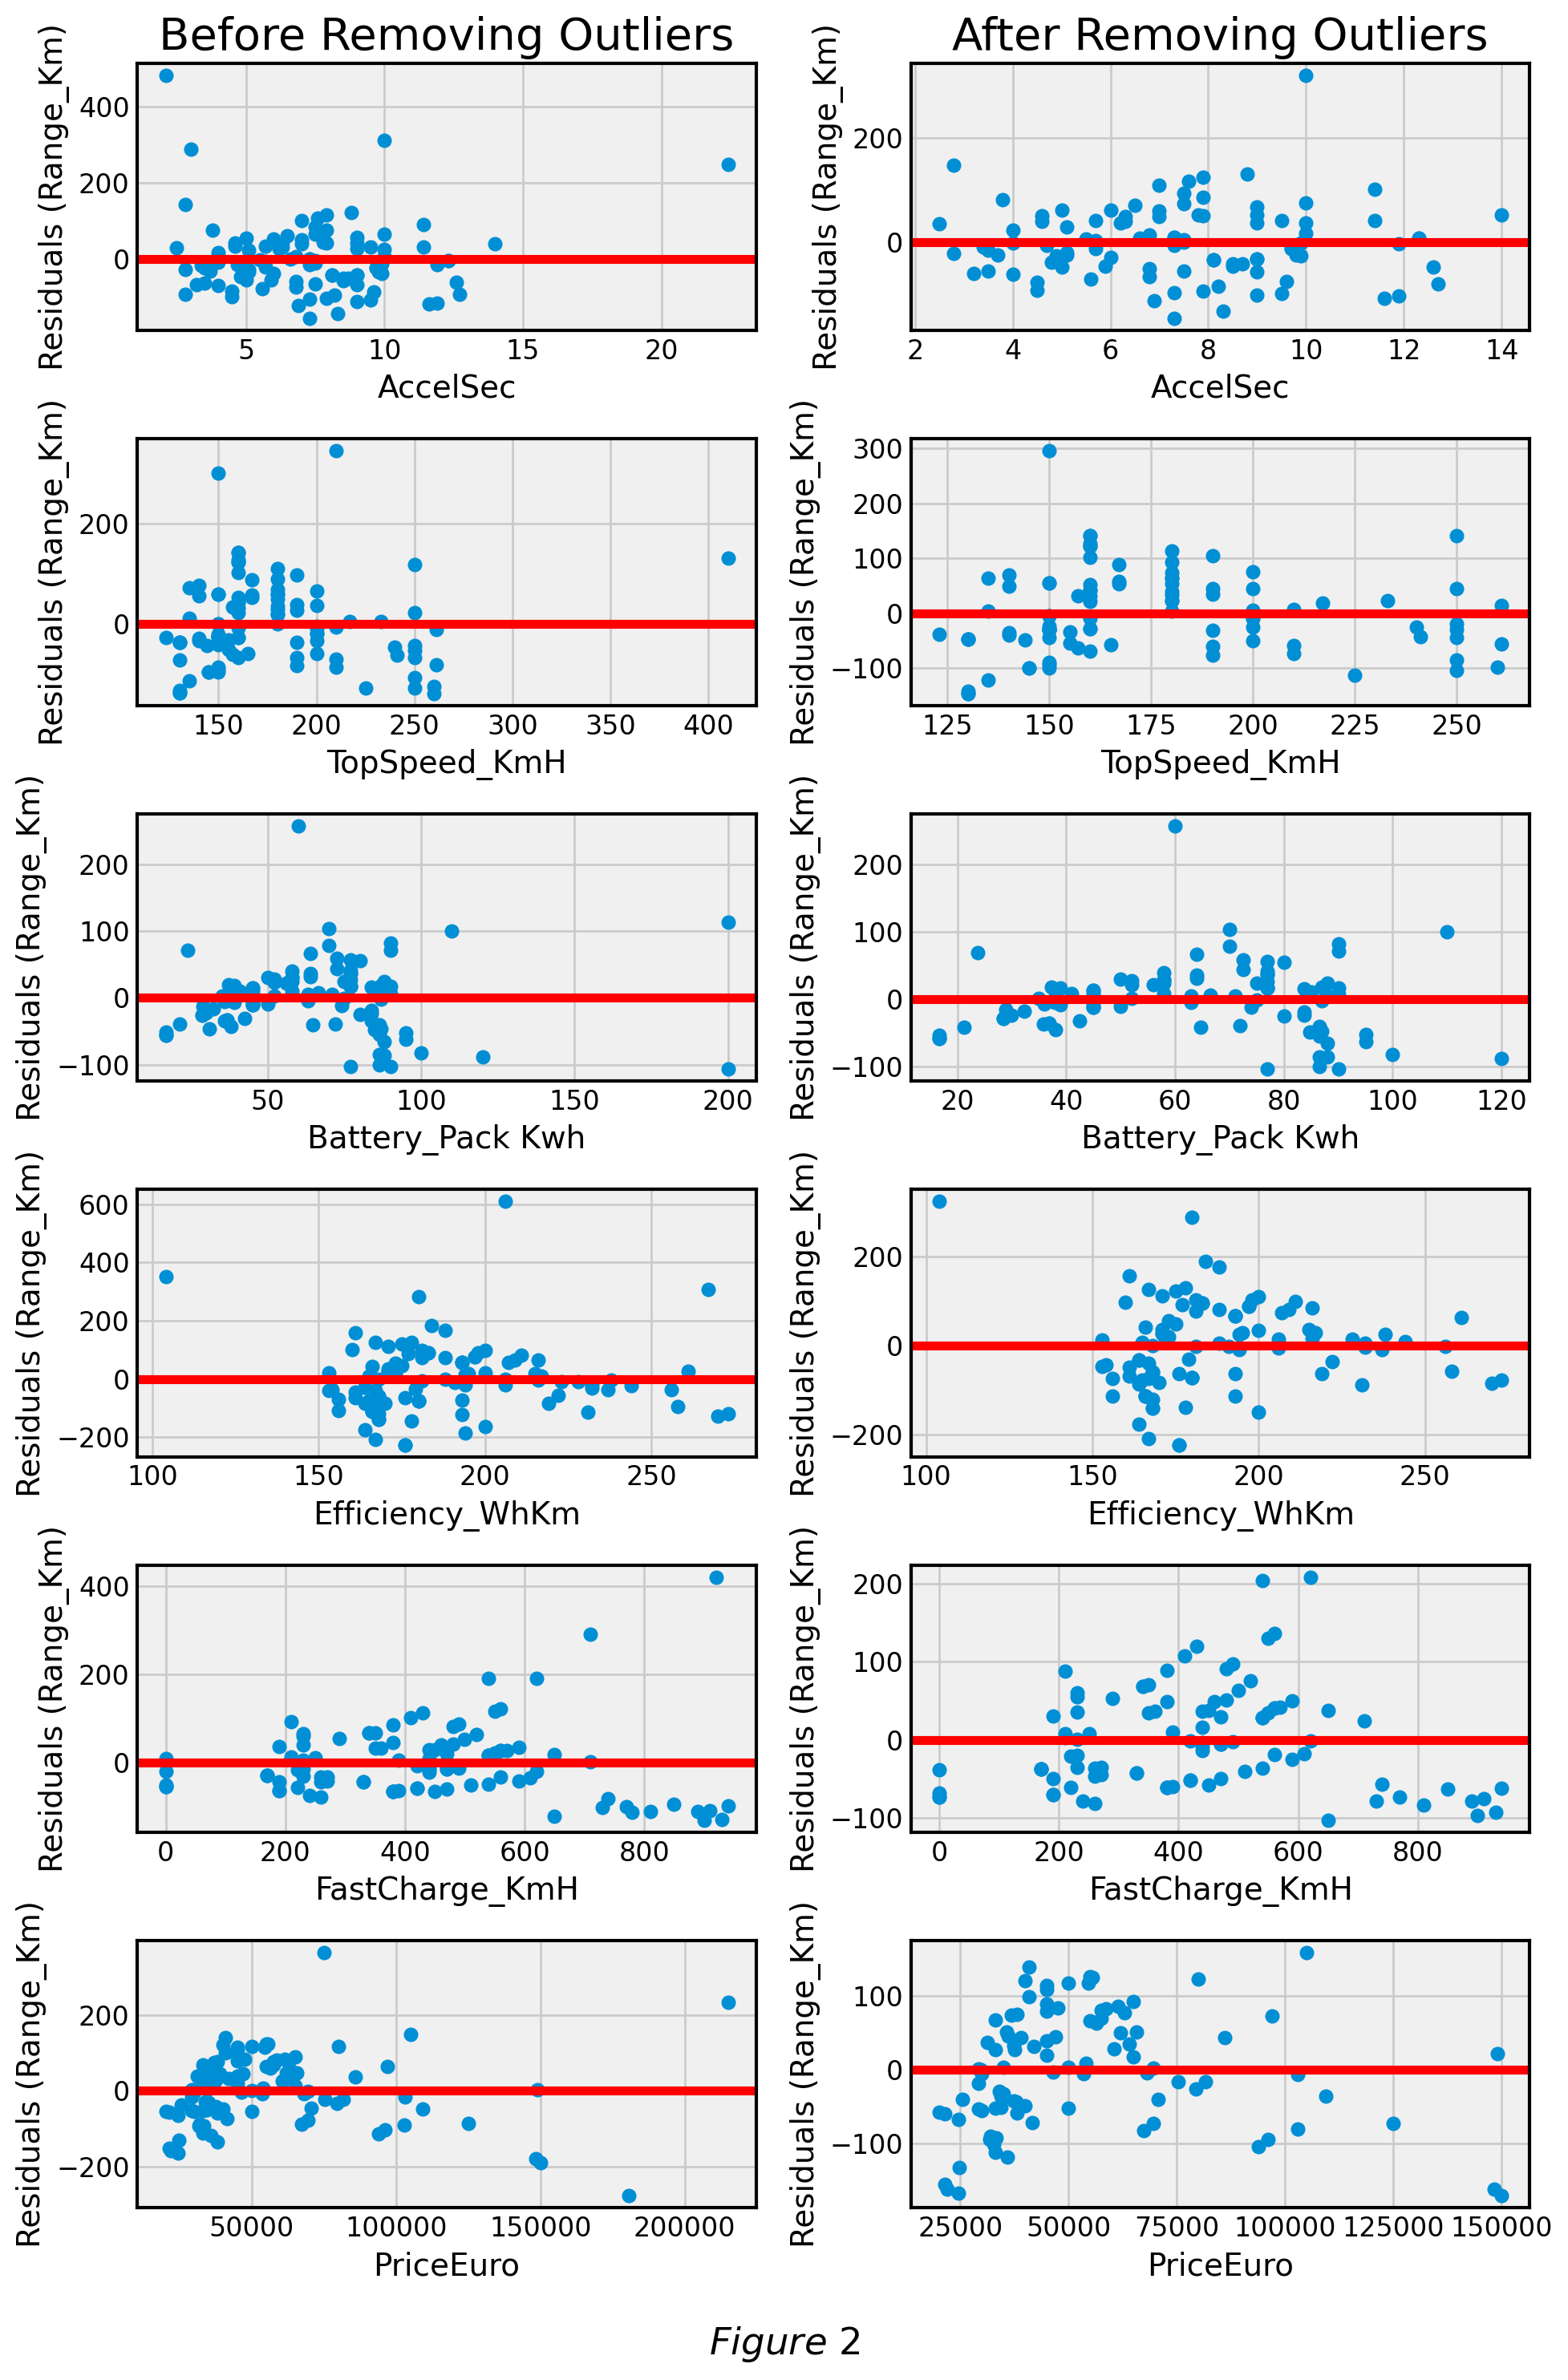

In [8]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), tight_layout=True)

axs[0, 0].set_title("Before Removing Outliers")
for idx, covariate in enumerate(quantitative):
    reg = LinearRegression()
    X_np = X[covariate].to_numpy().reshape(-1, 1)
    y_np = y.to_numpy().reshape(-1, 1)
    reg.fit(X_np, y_np)
    y_hat = reg.predict(X_np)
    res = y_np - y_hat
    axs[idx, 0].scatter(X_np, res)
    axs[idx, 0].axhline(0, color='r')
    axs[idx, 0].set_xlabel(covariate, fontsize=14)
    axs[idx, 0].set_ylabel('Residuals (Range_Km)', fontsize=14)
    axs[idx, 0].tick_params(axis='both', labelsize=12)
    
axs[0, 1].set_title("After Removing Outliers")
for idx, covariate in enumerate(quantitative):
    reg = LinearRegression()
    X_np = X_clean[covariate].to_numpy().reshape(-1, 1)
    y_np = y_clean.to_numpy().reshape(-1, 1)
    reg.fit(X_np, y_np)
    y_hat = reg.predict(X_np)
    res = y_np - y_hat
    axs[idx, 1].scatter(X_np, res)
    axs[idx, 1].axhline(0, color='r')
    axs[idx, 1].set_xlabel(covariate, fontsize=14)
    axs[idx, 1].set_ylabel('Residuals (Range_Km)', fontsize=14)
    axs[idx, 1].tick_params(axis='both', labelsize=12)
    
lbl = fig.supxlabel(r"$Figure$ 2")

We found a minimal difference in the strength of the linear relationship (measured with $R^2$) between the covariates and response variable when filtering outliers. Additionally, our dataset is relatively small with 102 samples. For these reasons, we decided not to remove outliers for further stages of our analysis.


In [9]:
df_r_2 = pd.DataFrame(dict_r_2)
# print(df_r_2.style.to_latex())

$$
\begin{array}{|c|c|c|}
\hline
\text{Covariate} & R^2 \text{ Before} & R^2 \text{ After} \\
\hline
\verb|AccelSec| & 0.46 & 0.522 \\
\hline
\verb|TopSpeed_KmH| & 0.56 & 0.463 \\
\hline
\verb|Battery_Pack Kwh| & 0.829 & 0.753 \\
\hline
\verb|Efficiency_WhKm| & 0.098 & 0.068 \\
\hline
\verb|FastCharge_KmH| & 0.569 & 0.6 \\
\hline
\verb|PriceEuro| & 0.458 & 0.411 \\
\hline
\end{array}
$$

<h4 style="text-align: center;"><i>Table</i> 1</h4>

## Normal Quantile Plot

In order to verify one of the central assumptions of linear regression, normally distributed residuals, we created a Q-Q plot in Figure 3 for all of our covariates to observe that this assumption holds true for most of our covariates.

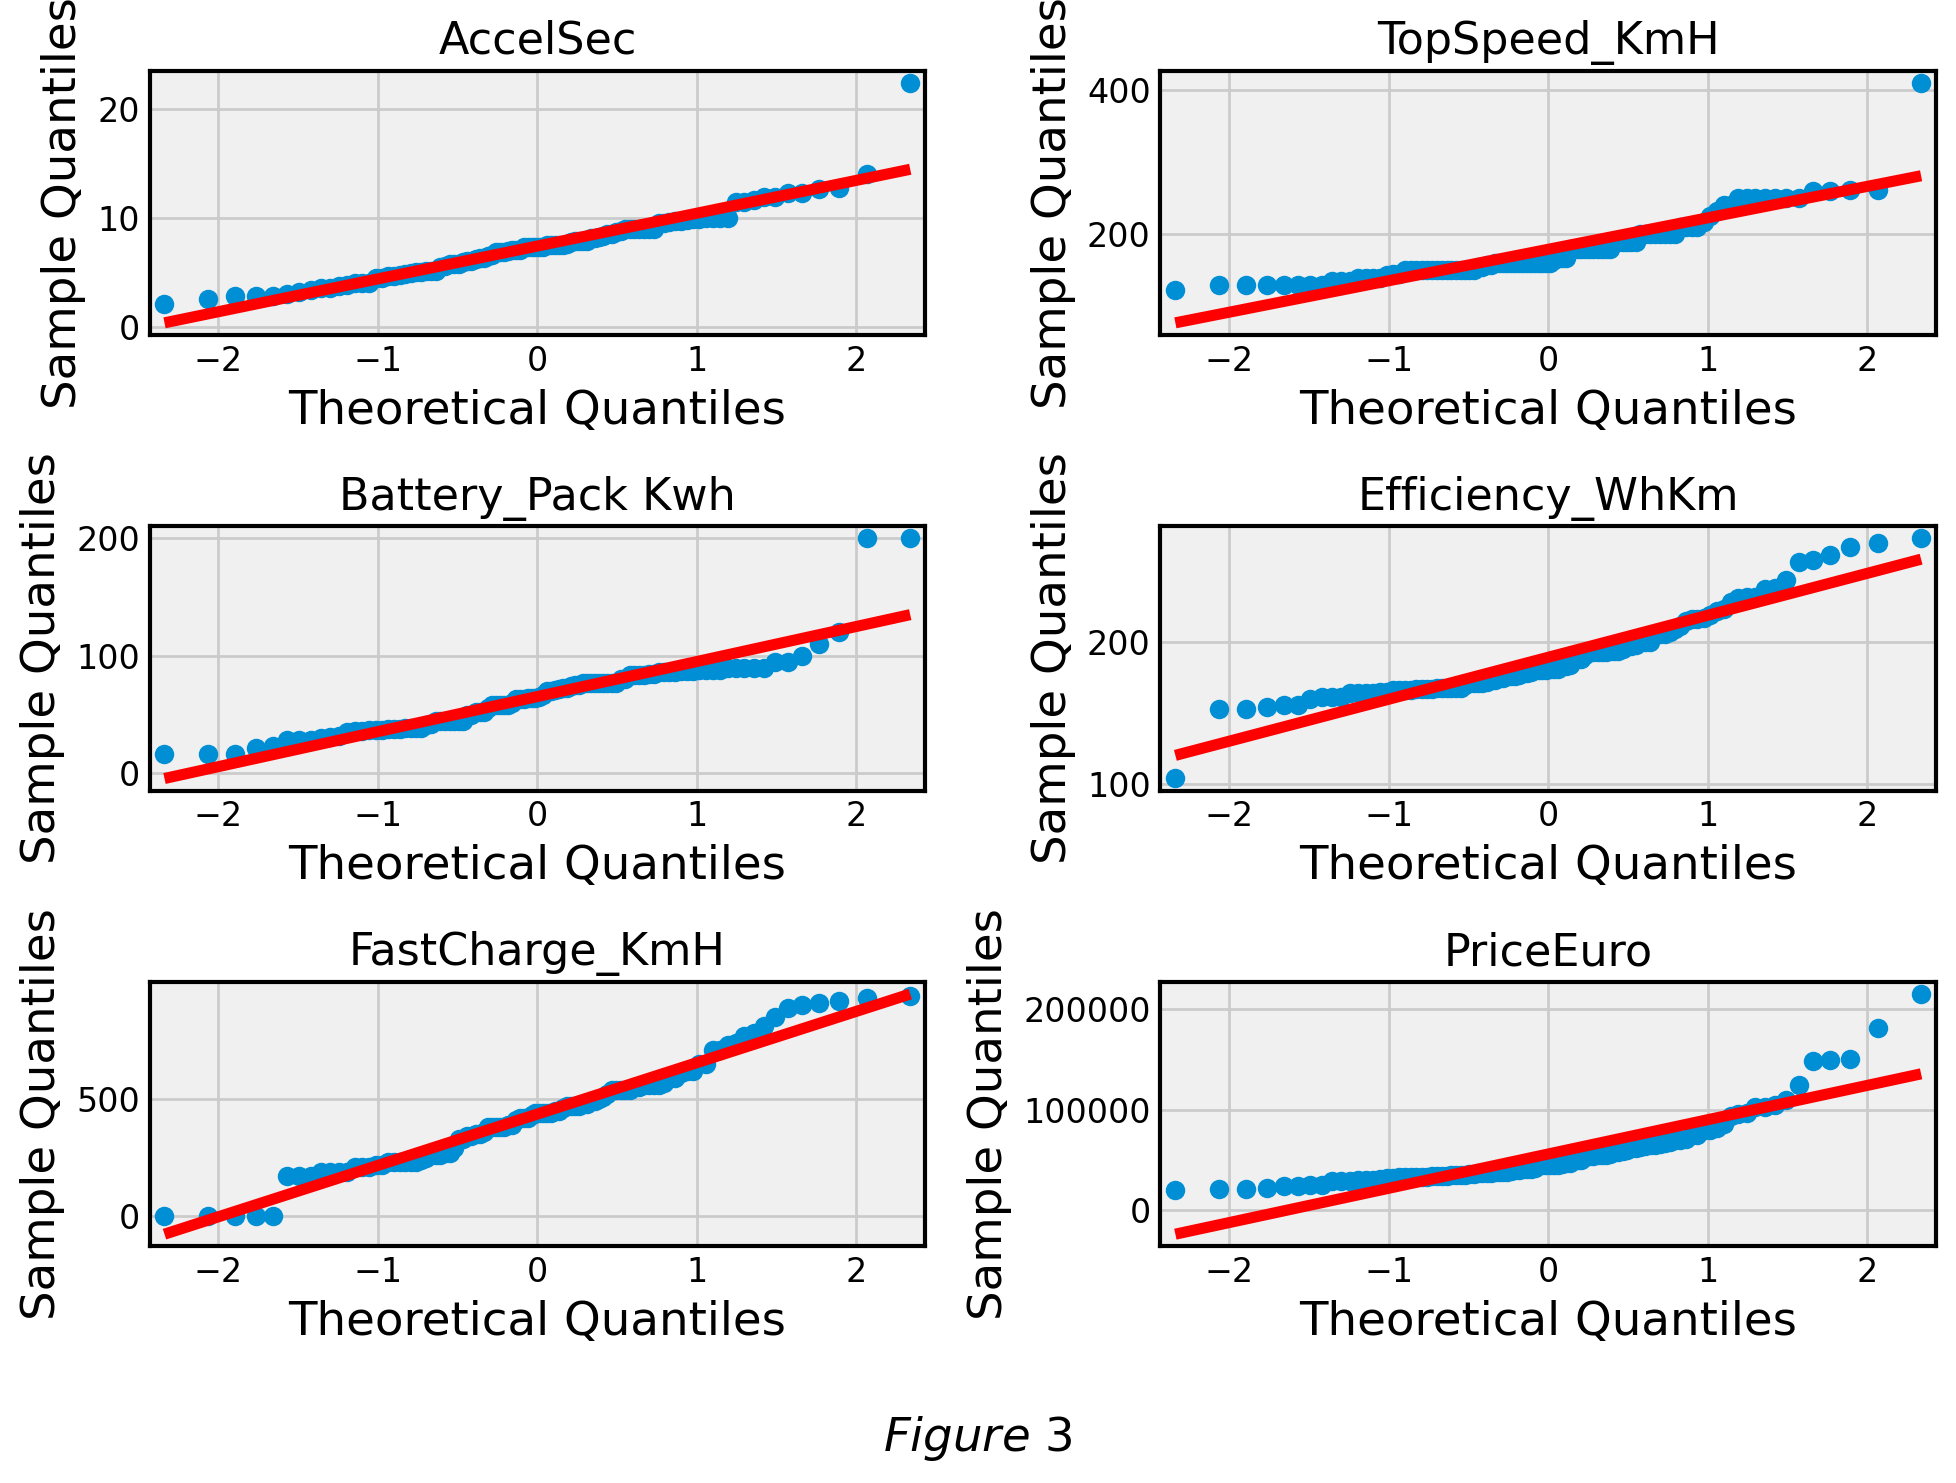

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 7.5), tight_layout=True)
for ax, covariate in zip(axs.ravel(), quantitative):
    X_np = quantitative[covariate]
    y_np = y
    ax.set_title(covariate, fontsize=16)
    ax.tick_params(axis="both", labelsize=12)
    
    sm.qqplot(X_np, line="s", ax=ax)
    
lbl = fig.supxlabel(r"$Figure$ 3")

# Transformations
Analyzing most of the residuals we can see that most of them are random, normally distributed, independent, and show homoscedasticity. However, these conditions are not met for the covariates Battery pack and Price in Euro. For this reason, we decided that it is important to transform Battery pack and Price in Euro. 

We tested two conventional transformations. First, we applied square root transformations on Battery pack and Price in Euro. Next, we applied log transformations to the two covariates. We determined that the log transformations led to a stronger linear relationship ($R^2$) so our final transformation was a log transform on Battery Pack and Price. Figure 4 shows the improved residual plots after the log transformation:

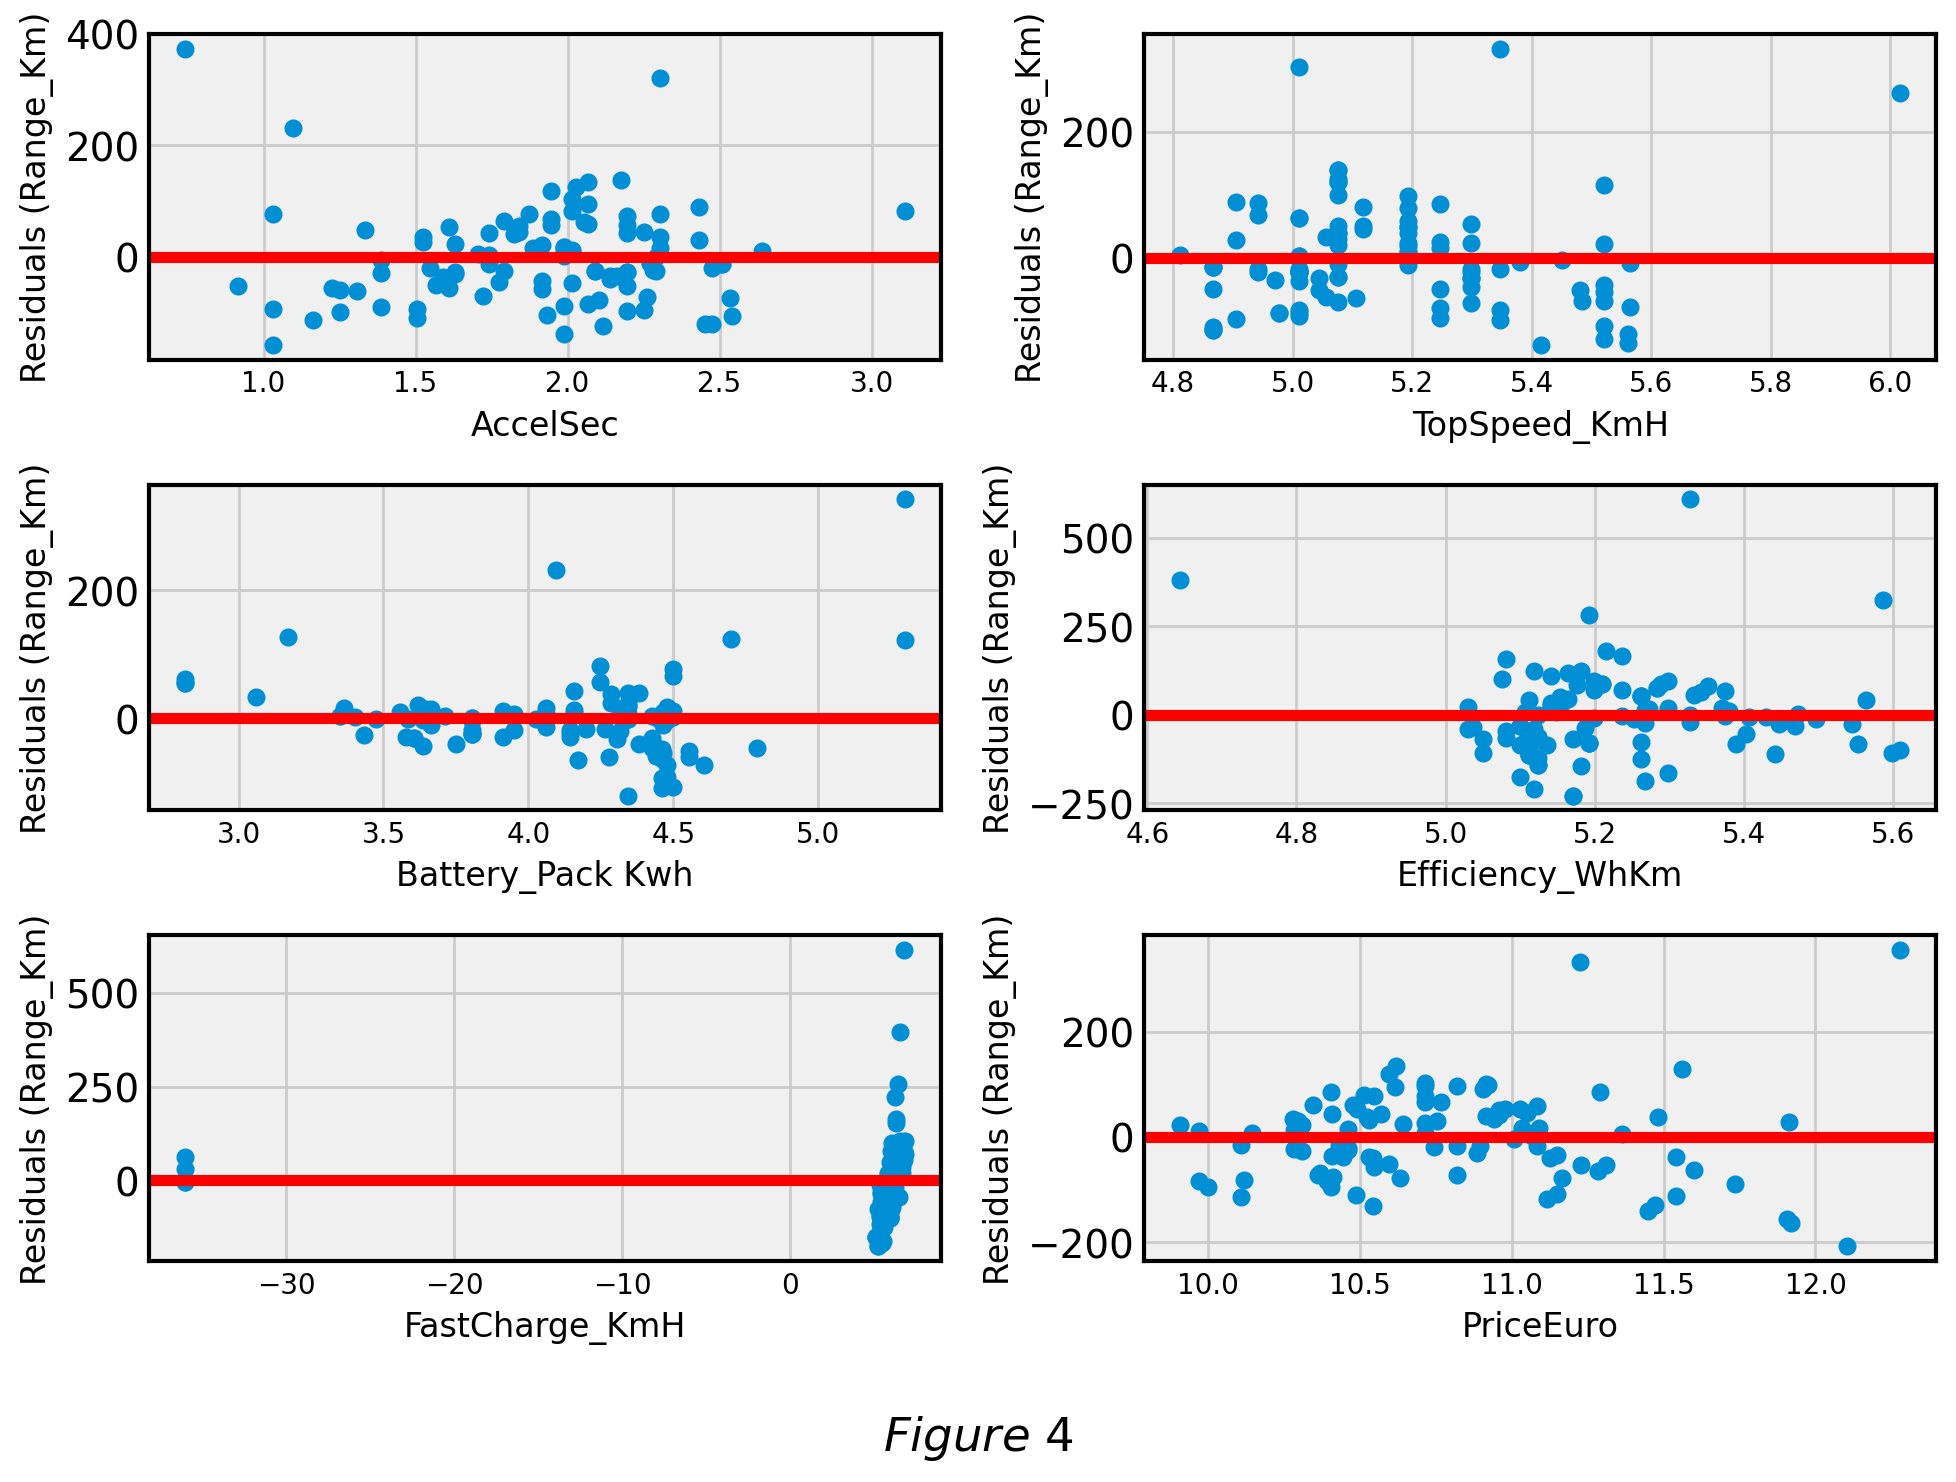

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 7.5), tight_layout=True)
for ax, covariate in zip(axs.ravel(), quantitative):
    reg = LinearRegression()
    X_np = np.log(X[covariate].to_numpy().reshape(-1, 1) + np.finfo(np.float64).eps)
    y_np = y.to_numpy().reshape(-1, 1)
    reg.fit(X_np, y_np)
    y_hat = reg.predict(X_np)
    res = y_np - y_hat
    r_2 = round(r2_score(y_np, y_hat), 3)
    # display(Latex(f"$R^2$ for {covariate}: {r_2}"))
    ax.scatter(X_np, res)
    ax.axhline(0, color='r')
    ax.set_xlabel(covariate, fontsize=12)
    ax.set_ylabel('Residuals (Range_Km)', fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
# fig.savefig('log_transform_res_outliers_removed.png', dpi=300)

lbl = fig.supxlabel(r"$Figure$ 4")

$$
\begin{array}{|c|c|c|}
\hline
\text{Covariate} & R^2 \text{ Before} & R^2 \text{ After} \\
\hline
\verb|AccelSec| & 0.46 & 0.539 \\
\hline
\verb|TopSpeed_KmH| & 0.56 & 0.552 \\
\hline
\verb|Battery_Pack Kwh| & 0.829 & 0.768 \\
\hline
\verb|Efficiency_WhKm| & 0.098 &  0.087 \\
\hline
\verb|FastCharge_KmH| & 0.569 &  0.187 \\
\hline
\verb|PriceEuro| & 0.458 & 0.529 \\
\hline
\end{array}
$$

<h4 style="text-align: center;"><i>Table</i> 2</h4>

# Main Results

## Multicollinearity
We created a correlation coefficient matrix (Figure 5) in order to test for multicollinearity within our covariates. Range was highly correlated with all of our covariates which is a good sign that our model is predictive of range. We noticed that acceleration has a negative correlation with most of the other variables including range. The efficiency coefficient had the lowest correlation coefficient with range at 0.48. There is high correlation between price and our other covariates, and we believe there is evidence of multicollinearity because of the high correlation coefficient. Removing price may reduce the multicollinearity issues we encounter. It may be best to use a stepwise forward regression, to allow the model to remove covariates that are causing multicollinearity.

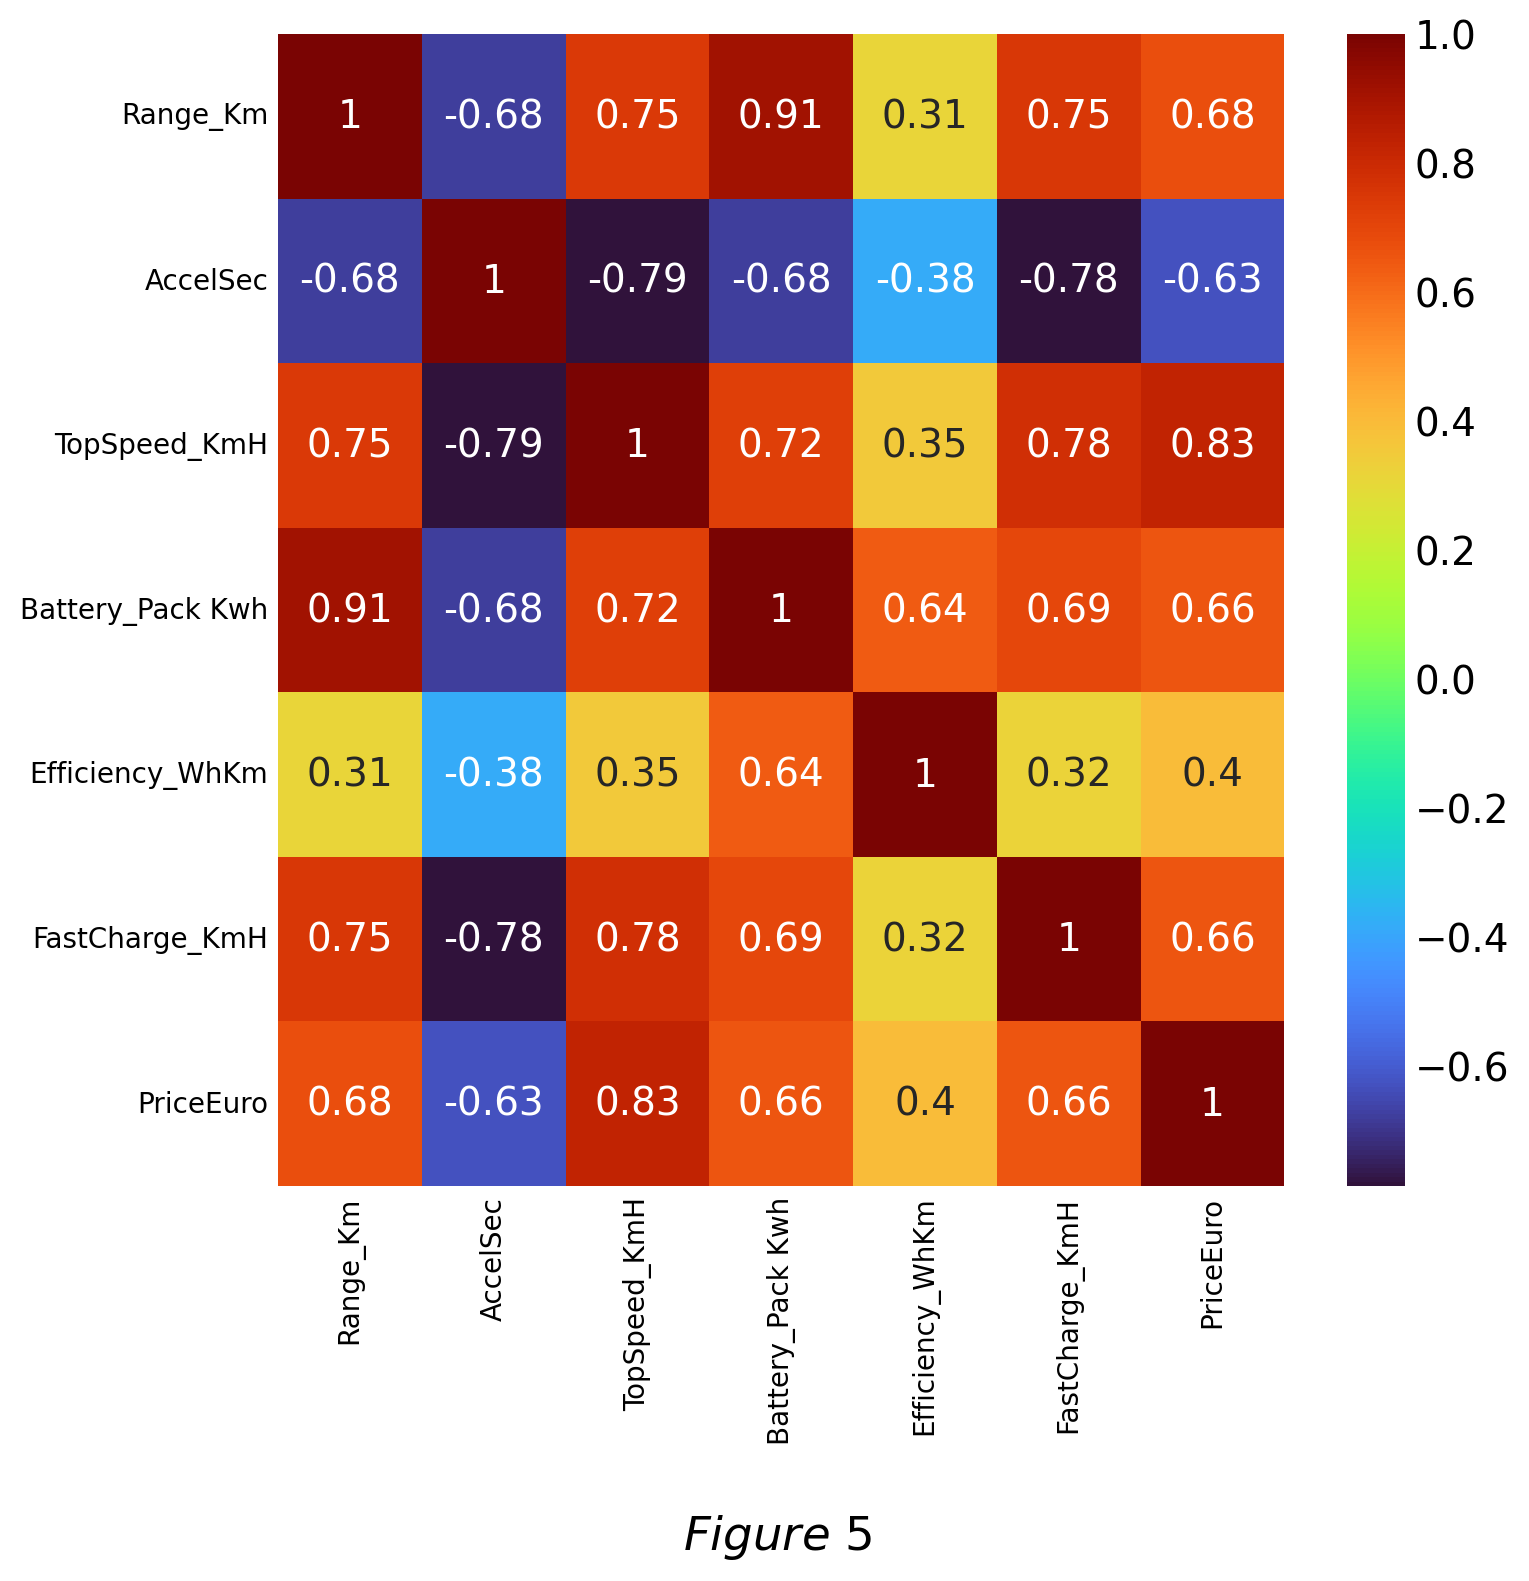

In [12]:
fig = plt.figure(figsize=(8, 8), tight_layout=True)
ax = fig.add_subplot(111)
features = pd.concat([y, quantitative], axis=1)
pearson_corr = features.corr()
ax.tick_params(labelsize=10)
ax = sns.heatmap(pearson_corr, cmap='turbo', annot=True, ax=ax)
# fig.savefig('quantitative_features_corr.png', dpi=300)

lbl = fig.supxlabel(r"$Figure$ 5")

With the covariates that remained after feature selection, we measured multicollinearity using the variance inflation factor (VIF) given by:

$$VIF_i = \frac{1}{1 - {R_i}^2}$$

The result (Figure 7) shows that all of the selected covariates are below 5, which means that they will not have multicollinearity. The variable TopSpeed is less significant than the other covariates, but because it is significant at the 5% level and has a VIF level below 10,  we believe it should still be included for analysis.

## Variable Selection

$$
\begin{array}{|c|c|c|}
\hline 
\text { Method } & \text { Prob to enter/leave } & \text{ Equation } & R_a^2 \\
\hline 
\text { Forward Selection } & 
\begin{array}{c}
    \text { PE: } 0.25 \\
    \text { PL: } 0.1
\end{array} &
\hat{y}=-909.39+0.29 x_1+39.04 x_2-2.08 x_3+288.90 x_4-28.80 x_5+8.22 x_6-45.13 x_7-52.62 x_8+70.71 x_9 + 43.78 x_{10} & 0.941 \\
\hline
\text { Backward Elimination } & 
\begin{array}{c}
    \text { PE: } 0.25 \\
    \text { PL: } 0.1
\end{array} & 
\hat{y}=-909.39+0.29 x_1+39.04 x_2-2.08 x_3+288.90 x_4-28.80 x_5+8.22 x_6-45.13 x_7-52.62 x_8+70.71 x_9 + 43.78 x_{10} & 0.941 \\
\hline
\text { Mixed } &
\begin{array}{l}
    \text { PE: } 0.25 \\
    \text { PL:0.25 }
\end{array} &
\hat{y}=-909.39+0.29 x_1+39.04 x_2-2.08 x_3+288.90 x_4-28.80 x_5+8.22 x_6-45.13 x_7-52.62 x_8+70.71 x_9 + 43.78 x_{10} & 0.941 \\
\hline
\mathrm{AICC} &
&
\hat{y}=-909.39+0.29 x_1+39.04 x_2-2.08 x_3+288.90 x_4-28.80 x_5+8.22 x_6-45.13 x_7-52.62 x_8+70.71 x_9 + 43.78 x_{10} & 0.941 \\
\hline
\mathrm{BIC} &
&
\hat{y}=-909.39+0.29 x_1+39.04 x_2-2.08 x_3+288.90 x_4-28.80 x_5+8.22 x_6-45.13 x_7-52.62 x_8+70.71 x_9 + 43.78 x_{10} & 0.941 \\
\hline
\end{array}
$$

<h4 style="text-align: center;"><i>Table</i> 3</h4>

## Model Fit
The transformations that we included in our model included the log of price and log of battery pack. We achieved a perfect ${R_a}^2$ value and realized that the car Model and brand covariate had a high cardinality (factor levels were equal to the number of data points in this case), hence, causing overfitting (over-generalization) of the fitted model. For this reason, we removed the a Model and brand covariate and were left with a much more applicable adjusted ${R_a}^2$ and low RMSE that predicts range.


| Summary of Fit                |          |
| ----------------------------- | -------- |
| **RSquare**                   | 0.954078 |
| **RSquare Adj**               | 0.949031 |
| **Root Mean Square Error**    | 28.60422 |
| **Mean of Response**          | 338.6275 |
| **Observations(or Sum Wgts)** | 102      |

<h4 style="text-align: center;"><i>Table</i> 4</h4>

| Source       | DF  | Sum of Squares | Mean Square | F Ratio      |
| ------------ | --- | -------------- | ----------- | ------------ |
| **Model**    | 10  | 1546901.5      | 154690      | 189.0612     |
| **Error**    | 91  | 74456.3        | 818         | **Prob > F** |
| **C. Total** | 101 | 1621357.8      |             | <.0001*      |

<h4 style="text-align: center;"><i>Table</i> 5</h4>

| Term                                                                  | Estimate  | Std Error | t Ratio |  <div style="width:5rem">Prob $> |t|$</div>|
| --------------------------------------------------------------------- | --------- | --------- | ------- | -------------- |
| Intercept                                                             | -909.3919 | 117.3835  | -7.75   | $<.0001$       |
| TopSpeed_KmH                                                          | 0.2942874 | 0.140142  | 2.10    | $0.0385$         |
| RapidCharge[No]                                                       | 39.042448 | 8.552891  | 4.56    | $<.0001$       |
| Efficiency_WhKm                                                       | -2.078849 | 0.161668  | -12.86  | $<.0001$       |
| Log(Battery_Pack Kwh)                                                 | 288.89749 | 14.30833  | 20.19   | $<.0001 *$     |
| BodyStyle{SPV&Hatchback&MPV&SUV-Station&Sedan&Cabrio&Liftback&Pickup} | -28.80209 | 5.374477  | -5.36   | $<.0001 *$     |
| BodyStyle{SPV&Hatchback-MPV&SUV}                                      | 8.2153396 | 3.623798  | 2.27    | $0.0258$         |
| BodyStyle{Station&Sedan&Cabrio&Liftback-Pickup}                       | -45.12672 | 12.9488   | -3.49   | $0.0008 *$     |
| BodyStyle{Station&Sedan-Cabrio&Liftback}                              | -52.61664 | 6.97113   | -7.55   | $<.0001 *$     |
| BodyStyle{Cabrio-Liftback}                                            | 70.712853 | 11.46589  | 6.17    | $<.0001 *$     |
| Log(PriceEuro)                                                        | 43.782414 | 14.52427  | 3.01    | $0.0033^*$     |

<h4 style="text-align: center;"><i>Table</i> 6</h4>

After we used forward selection as our variable selection method and set p-value enter is 0.25 and p-value leave as 0.1, we determined our final model to be as follows:

$$
\hat{y} = -909.39 + 0.29x_1 + 39.04x_2 - 2.08x_3 + 288.90x_4 - 28.80x_5 +  8.22x_6 - 45.13x_7 - 52.62x_8 + 70.71x_9 + 43.78x_{10} \\
\text{ } \\
\text{where } x \text{ are listed in the table below:}
$$

$$
\begin{array}{|c|c|}
\hline x_1 & \verb|Topspeed_KmH| \\
\hline x_2 & \verb|Rapid Charge| \\
\hline x_3 & \verb|Efficiency_WhKm| \\
\hline x_4 & \verb|log(Battery_Pack Kwh)| \\
\hline x_5 & \begin{array}{l}
\verb|BodyStyle{SPV&Hatchback&MPV&SUV–| \\
\verb|Station&Sedan&Cabriolet&Lift back&Pickup}|
\end{array} \\
\hline x_6 & \verb|BodyStyle{SPV&Hatchback–MPV&SUV}| \\
\hline x_7 & \begin{array}{c}
\verb|BodyStyle{Station&Sedan&Cabriolet&Lift| \\
\verb|back–Pickup}|
\end{array} \\
\hline x_8 & \begin{array}{c}
\verb|BodyStyle{Station&Sedan–Cabriolet&Lift| \\
\verb|back}|
\end{array} \\
\hline x_9 & \verb|BodyStyle{Cabriolet–Lift back}| \\
\hline x_{10} & \verb|log(PriceEuro)| \\
\hline
\end{array}
$$

<h4 style="text-align: center;"><i>Table</i> 7</h4>

We found our final model to be adequate as it had a high ${R_a}^2$ and all of the covariates we found were significant at the $\alpha = 0.05$ level. The reason we used forward selection is to remove the issue of multicollinearity and it was the simplest and easiest model.
Figure 9 shows the performance of our model. Some points to highlight are that our model’s ${R_a}^2$ is 0.949, has a statistically significant $F$ statistic of 189.061 in the ANOVA test.

## Model Interpretation

There is a natural interpretation of the covariates in that each one shows us how much they affect the range of EVs. The data we got shows that the battery pack does affect the range the most. Other than the powertrain covariate, all of the data was significant at the 5% level of significance. We found how the different body styles of cars can affect the range as well. 

# Conclusion
Based on the results of our model we can see that there is a strong positive correlation between battery pack and range. This can help consumers and car manufacturers when designing new EVs to create larger battery packs and understand that with the combination of Bodystyle we can see which are the best cars for range. For example, Cabrio or convertibles and hatchbacks have the greatest impact on range with their coefficient being 42. SUVs and pickup trucks for example have a negative effect on range. 

Another interesting covariate we found was how rapid charge effects range, with it being the third largest $\beta$  that we found. This makes sense as charging cars will lead to more range for the car, it could make the car more efficient. The price was also another factor that impacts range, one that makes sense as price increases, the technology and range of the EV increases as well. Our model allows car manufacturers, consumers, and investors to understand the factors of EVs that most affect range allowing for better improvement of EVs for the future, improving the environment and lowering the market for gas powered vehicles.


# Contributions
Group met on Zoom a couple times to work on the project together. Each member had worked on some parts of the project as listed below:

**Yuhang Du**: Presentation

**Matthew George**: JMP Analysis, Introduction, Background, Conclusion

**Xiangru He**: JMP Analysis, Introduction, Background, Contributions

**Alex Lavaee**: Data Cleaning, Data Preparation, Visual Generation, Report Preparation

**Yujie Yang**: Presentation